In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-dataset/heart.csv


# Heart Disease 
## Previsão de Ataques Cardíacos usando Machine Learning
##### Neste notebook, exploraremos um conjunto de dados médicos que contém informações médicas sobre pacientes e se eles registraram ou não a doença em questão. Ou seja, se trata de um conjunto com dados rotulados, com a variável target (alvo) sendo a ocorrência (target = 1) ou não (target = 0) do ataque naquele paciente.

## Objetivo e descrição
##### O objetivo principal deste projeto é desenvolver modelos de Machine Learning capazes de classificar corretamente os pacientes em relação ao risco de ataque cardíaco. Avaliaremos vários algoritmos de aprendizado de máquina para determinar qual modelo oferece o melhor desempenho em termos de precisão. Através das características da base de dados, do objetivo da problemática e da presença da variável target, é possível detectar a necessidade de uma análise preditiva por meio do uso de algoritmos de aprendizagem supervisionada, se tratando de um problema de classificação.

## Conjunto de Dados
O conjunto de dados utilizado neste projeto contém várias características médicas que podem ser relevantes para a previsão do risco de ataque cardíaco.  O objetivo é usar essas informações para determinar se um paciente tem maior probabilidade de sofrer um ataque cardíaco. Segue abaixo mais informações sobre o conjunto de dados:

**age**: idade do paciente

**sex**: sexo do paciente (0 = feminino, 1 = masculino)

**cp**: tipo de dor no peito (4 valores)

**trestbps**: pressão sanguínea em repouso

**chol**: colesterol sérico em mg/dl

**fbs**: açúcar no sangue em jejum (> 120 mg/dl)

**restecg**: resultados eletrocardiográficos em repouso (valores 0, 1, 2)

**thalach**: frequência cardíaca máxima alcançada

**exang**: angina induzida por exercício

**oldpeak**: depressão de ST induzida pelo exercício em relação ao repouso

**slope**: inclinação do segmento ST de pico no exercício

**ca**: número de grandes vasos (0-3) coloridos por fluoroscopia

**thal**: tipo de defeito cardíaco (0 = normal; 1 = defeito fixo; 2 = defeito reversível)

## Imports

In [2]:
#Para manipulação, análise exploratória e visualização dos dados
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

Pacotes "padrão" para projetos de análise de dados

In [3]:
# Para os modelos que serão criados
from sklearn.model_selection import train_test_split #Possibilita divisão dos dados para treino e teste facilmente
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Serão úteis para posterior análise de rendimento dos modelos
from sklearn.preprocessing import StandardScaler # Utilizaremos para as variáveis numéricas, deixando as features na mesma escala de forma fácil (maioria dos modelos de ML esperam receber dados padronizados e na mesma escala para melhor performance)

# Modelos que serão testados
from sklearn.linear_model import LogisticRegression # modelo de classificação que é usado para prever a probabilidade de uma observação pertencer a uma classe ou outra (binária)
from sklearn.tree import DecisionTreeClassifier # modelo que aprende a tomar decisões com base em um conjunto de regras de decisão simples inferidas a partir dos dados de treinamento. 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier # algoritmo de boosting que combina vários classificadores fracos para formar um classificador forte
from sklearn.neighbors import KNeighborsClassifier # goritmo de classificação que classifica uma instância com base na maioria das classes de seus k vizinhos mais próximos no espaço de características.


Embora cada modelo tenha suas próprias peculiaridades e hipóteses subjacentes, todos eles compartilham o objetivo comum de criar um relacionamento entre os dados de entrada e as classes de saída para realizar tarefas de classificação. São portanto, modelos de aprendizado supervisionado.

# Carregando os dados
#### A primeira parte do código (no topo do notebook) fornece o endereço caso você não tenha baixado manualmente e salvado em alguma pasta, você pode carregar o arquivo dirertamente com o endereço fornecido.

In [4]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

#### Retornando as primeiras linhas para teste

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Análise Exploratória dos Dados

#### Checando formato do dataframe, ou seja (linhas x colunas)

In [6]:
df.shape

(1025, 14)

Com os códigos acima é possível então ter uma primeira ideia da disposição do df.

Temos 14 colunas, sendo 1 delas a variável target (alvo) - da ocorrência ou não da doença, e as outras 13 de variáveis que podem influenciar o resultado investigado, sendo chamadas de variáveis explicativas, ou features.

Além disso, possuímos 1025 registros de pacientes.

#### Checando as principais informações das colunas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Checando ausência de dados

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Nenhum dado faltante nas colunas

## Checando registros duplicados

In [9]:
df.duplicated().sum()

723

##### Ou seja, existem 723 registros duplicados que tanto para projetos de análise descritiva quanto preditiva se tornam problemas que devem ser resolvidos. No caso, utilizando o bom senso, é muito difícil que pacientes apresentem dentre as 14 variáveis, valores exatamente iguais entre eles, portanto iremos optar por descartar esses registros para seguir na análise e posteriormente treinamento dos modelos (para evitar overfit - treinamento acima do necessário para a mesma linha)

### Eliminando registros duplicados

In [10]:
df1 = df.drop_duplicates()

In [11]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Podemos ver que agora sobraram apenas 302 registros.

In [12]:
df1.reset_index(inplace = True)
df1

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [13]:
df1 = df1.drop(df1.columns[0], axis = 1)

In [14]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Apenas resetando o índice do novo df1

## Análise geral estatística

### Divisão entre variáveis quantitativas/numéricas e categóricas para análise e tratamento adequado a cada grupo

In [15]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Checando quantidade de valores diferentes que cada variável assume no df para embasar divisão

In [16]:
df1.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [17]:
c_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # Variáveis numéricas
c_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] #Variáveis categóricas

#### Análise estatística das variáveis numéricas

In [18]:
df1[c_num].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


Podemos ver que algumas variáveis possuem possíveis outliers em uma primeira análise, e será feito estudo mais profundo para confirmar e justificar a exclusão dos dados caso necessário.

Exemplo: variável 'chol' tem valor máximo 564, enquanto 75% dos dados estão até 274.75, o que no mínimo indica um ponto de atenção.

#### Análise de correlação entre as variáveis

In [19]:
df1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Fica pouco visível e difícil de identificar valores 'importantes' de correlação (próximos de 1 ou -1) pela quantidade de dados e formatação. Gráfico do pacote seaborn de heatmap ajuda neste caso:

<Axes: >

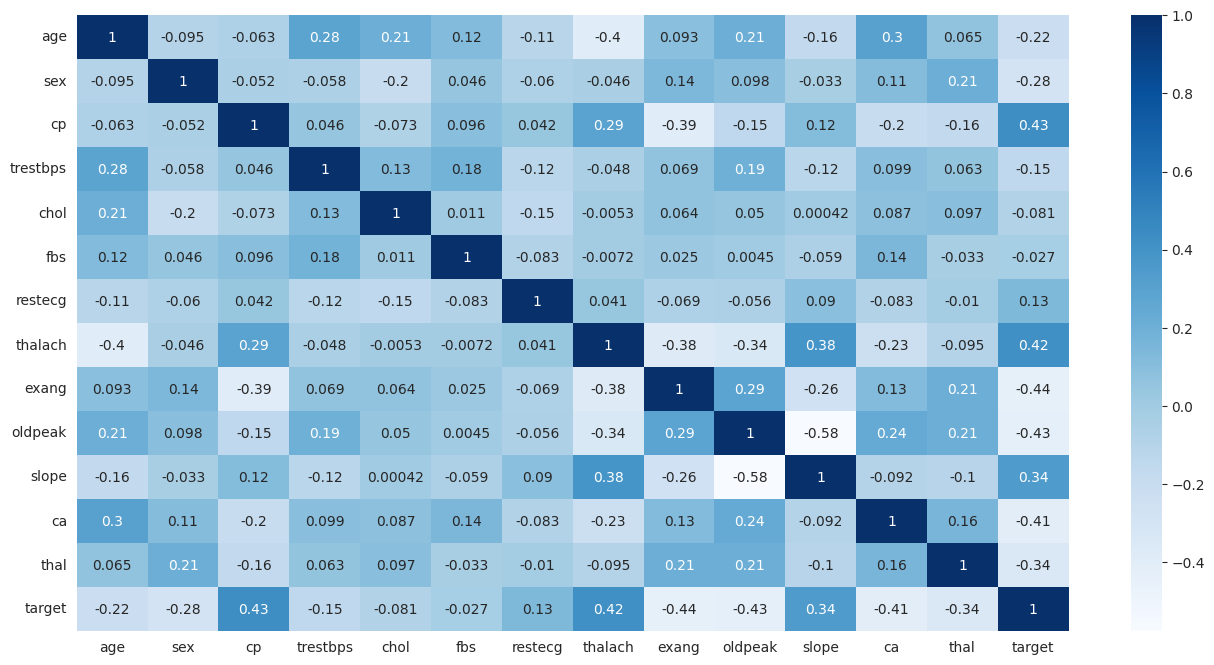

In [20]:
plt.figure(figsize = (16, 8) )
sns.heatmap(df1.corr(), annot = True, cmap = 'Blues')

#### Interessante analisar a correlação das variáveis com a variável alvo (valores mais escuros (próximos de 1) indicam correlação positiva, e valores mais claros (próximos de -1) indicam correlação negativa)

### Variáveis Categóricas

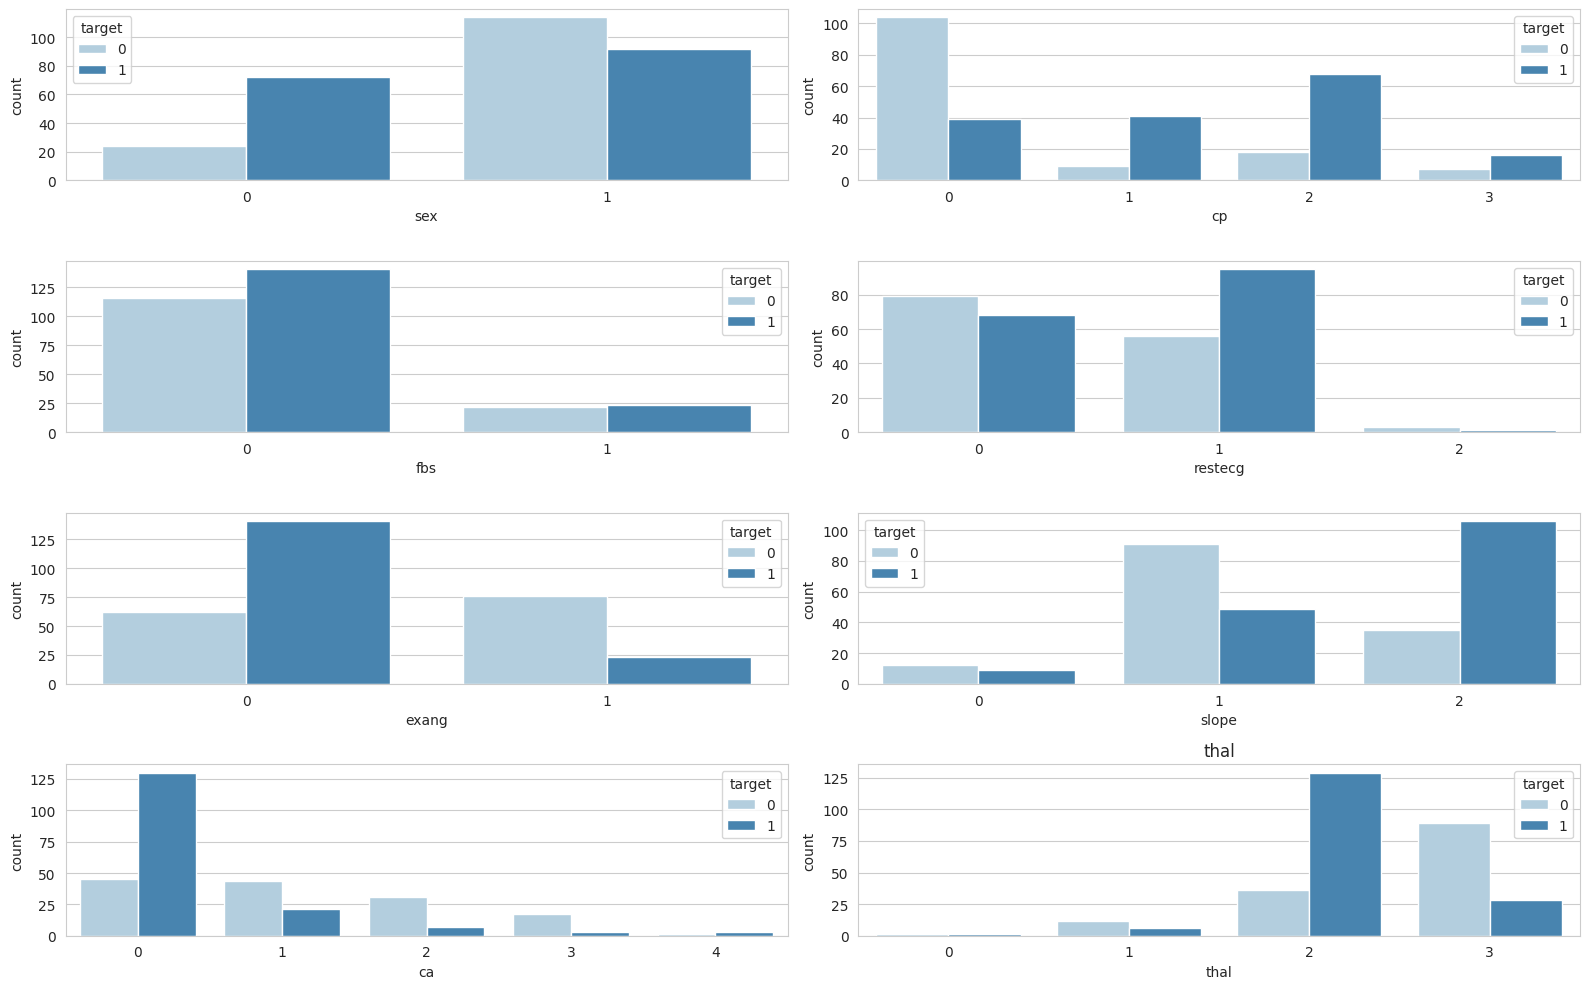

In [21]:
fig, axes = plt.subplots(4, 2, figsize =  (16,10))
for i, c in enumerate(c_cat):
    row = i//2
    col = i % 2
    ax = axes[row, col]
    if c in c_cat:
        plt.title(c)
        sns.countplot(x = df1[c], hue = df1['target'], palette = 'Blues', ax = ax)
    plt.tight_layout()

##### Exemplo de interpretação: no caso da variável de sexo, no primeiro gráfico plotado, podemos analisar que as mulheres (sex =  0) proporcionalmente são mais propensas a ter ataque cardíaco (target = 1) do que os homens (sex = 1) de acordo com esse conjunto de dados.

### Variáveis numéricas

In [22]:
import warnings

# Ignorar múltiplos tipos de warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Desabilitando avisos de future warnings para não poluir o notebook

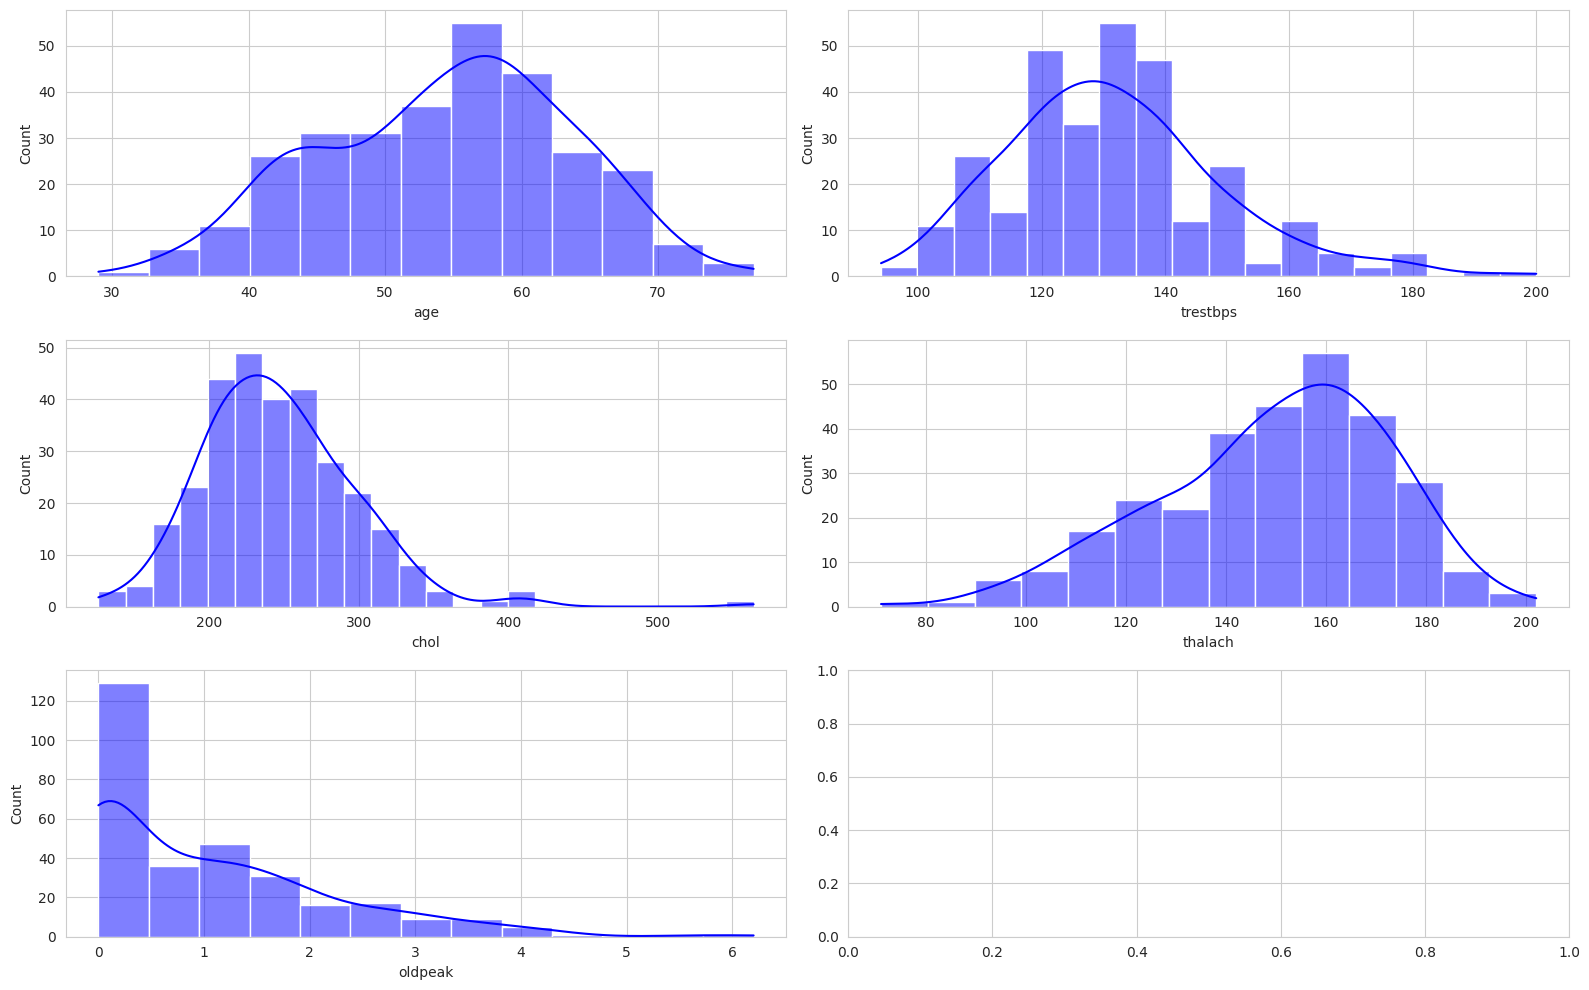

In [23]:
fig, axes = plt.subplots(3, 2, figsize =  (16,10))
for i, c in enumerate(c_num):
    row = i//2
    col = i % 2
    ax = axes[row, col]
    if c in c_num:
        sns.histplot(data = df1[c], kde = True, color = 'b', ax = ax)
    plt.tight_layout()

##### Além de facilitar a visualição da distribuição da frequência de ocorrência dos dados de cada uma dessas variáveis, é possível verificar a presença de outliers que já tínhamos suspeitado. Vamos tratá-los agora:

## Removendo Outliers

#### Verificando boxplots

In [24]:
len(c_num)

5

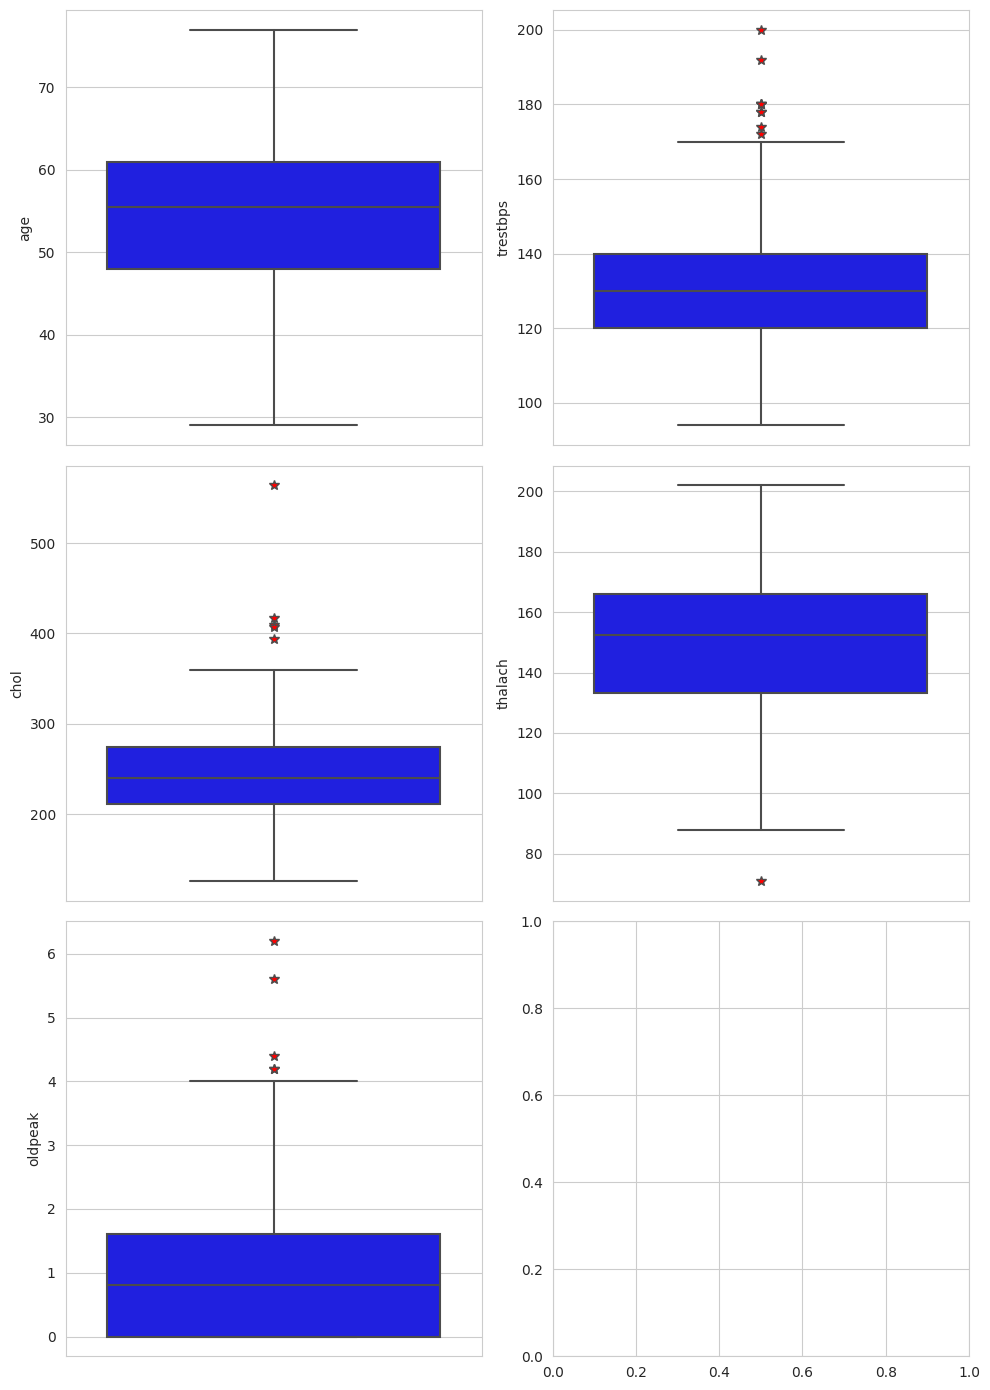

In [25]:
linha = 0
coluna = 0
plt.rcParams['figure.figsize'] = [10, 14]
fig, axes = plt.subplots(3,2)
for c in c_num:
    sns.boxplot(data = df1, y = c, ax = axes[linha,coluna], color ='b', flierprops = {'marker': '*', 'markerfacecolor': 'r', 'markersize': '7'} )
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0
plt.tight_layout()
plt.show()

#### Calculando quartis e intervalos para limite superior e inferior

In [26]:
df2 = df1
for c in c_num:
    print('-'*10, c, '-'*10)
    # Calcular quartis
    Q1 = np.percentile(df2[c], 25)
    Q3 = np.percentile(df2[c], 75)
    print(f'1º Quartil: {Q1}, 3º Quartil: {Q3}')
    # Calcular intervalo interquartil (IQR)
    IQR = Q3 - Q1
    print(f'IQR = {IQR}')
    # Definir limites para identificar outliers
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    print(f'Limite inferior: {lim_inf}, limite superior {lim_sup}')
     # Identificar outliers
    outliers = (df2[c] < lim_inf) | (df2[c] > lim_sup)
    print("Número de Outliers:", outliers.sum())
    # Exibir os valores de outliers para análise
    print("Valores de Outliers:")
    print(df2[c][outliers])
    
    # Remover outliers do dataframe
    df3 = df2[(df2[c] <= lim_sup)]
    df3 = df3[(df3[c] >= lim_inf)]
    print(df2.shape, df3.shape)
    df2 = df3

---------- age ----------
1º Quartil: 48.0, 3º Quartil: 61.0
IQR = 13.0
Limite inferior: 28.5, limite superior 80.5
Número de Outliers: 0
Valores de Outliers:
Series([], Name: age, dtype: int64)
(302, 14) (302, 14)
---------- trestbps ----------
1º Quartil: 120.0, 3º Quartil: 140.0
IQR = 20.0
Limite inferior: 90.0, limite superior 170.0
Número de Outliers: 9
Valores de Outliers:
28     180
44     178
76     174
112    180
124    192
142    200
226    172
248    180
271    178
Name: trestbps, dtype: int64
(302, 14) (293, 14)
---------- chol ----------
1º Quartil: 211.0, 3º Quartil: 274.0
IQR = 63.0
Limite inferior: 116.5, limite superior 368.5
Número de Outliers: 5
Valores de Outliers:
104    417
128    564
144    409
183    394
260    407
Name: chol, dtype: int64
(293, 14) (288, 14)
---------- thalach ----------
1º Quartil: 132.0, 3º Quartil: 167.25
IQR = 35.25
Limite inferior: 79.125, limite superior 220.125
Número de Outliers: 1
Valores de Outliers:
188    71
Name: thalach, dtype: in

In [27]:
df3[c_num].describe()

,age,trestbps,chol,thalach,oldpeak
count,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,129.883392,242.314488,149.961131,0.951943
std,9.128186,15.387795,44.654188,22.691625,1.026400
min,29.000000,94.000000,126.000000,88.000000,0.000000
25%,47.000000,120.000000,210.500000,133.500000,0.000000
50%,55.000000,130.000000,239.000000,153.000000,0.600000
75%,60.000000,140.000000,270.500000,168.000000,1.600000
max,77.000000,170.000000,360.000000,202.000000,4.000000


<Axes: >

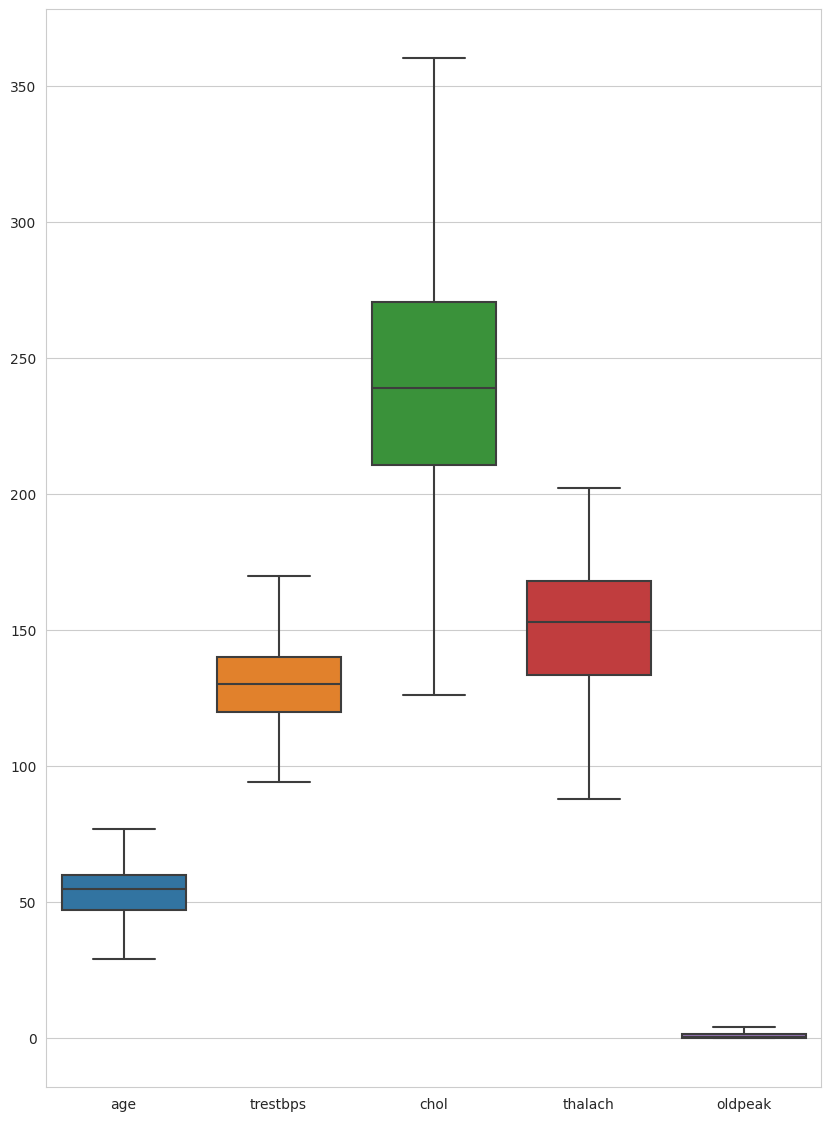

In [28]:
sns.boxplot(df3[c_num])

#### Como podemos ver, os outliers foram corretamente removidos

# Preparando os dados para o modelo

Primeiramente iremos converter essas categorias em variáveis numéricas que possam ser usadas em modelos de machine learning, através da função get_dummies(). Ela retorna uma nova representação para as categorias em uma espécie de matriz (com número de colunas igual ao número de possíveis categorias) preenchidos agora com 0 ou 1.

Facilita o treinamento do modelo.

Neste caso usaremos o drop_first = True para evitar multicolinearidade, já que é possível representar as *k* categorias com *k - 1* colunas, em que a primeira é descartada. Isso acontece já que se o valor de todas as colunas presentes para um registro for 0, significa que o valor True (1) é da primeira coluna descartada.

In [29]:
df4 = pd.get_dummies(df3, columns = c_cat, drop_first= True)
df4

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,120,211,115,1.5,1,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
298,44,108,141,175,0.6,1,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
299,52,128,255,161,0.0,0,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
300,59,160,273,125,0.0,0,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False


Veja que agora temos 23 counas para representar o mesmo conjunto de dados anterior

#### Verificando distribuição dos dados da variável alvo

In [30]:
cont = df4['target'].value_counts()
cont

target
1    158
0    125
Name: count, dtype: int64

<Axes: title={'center': 'Heart Disease'}, xlabel='target'>

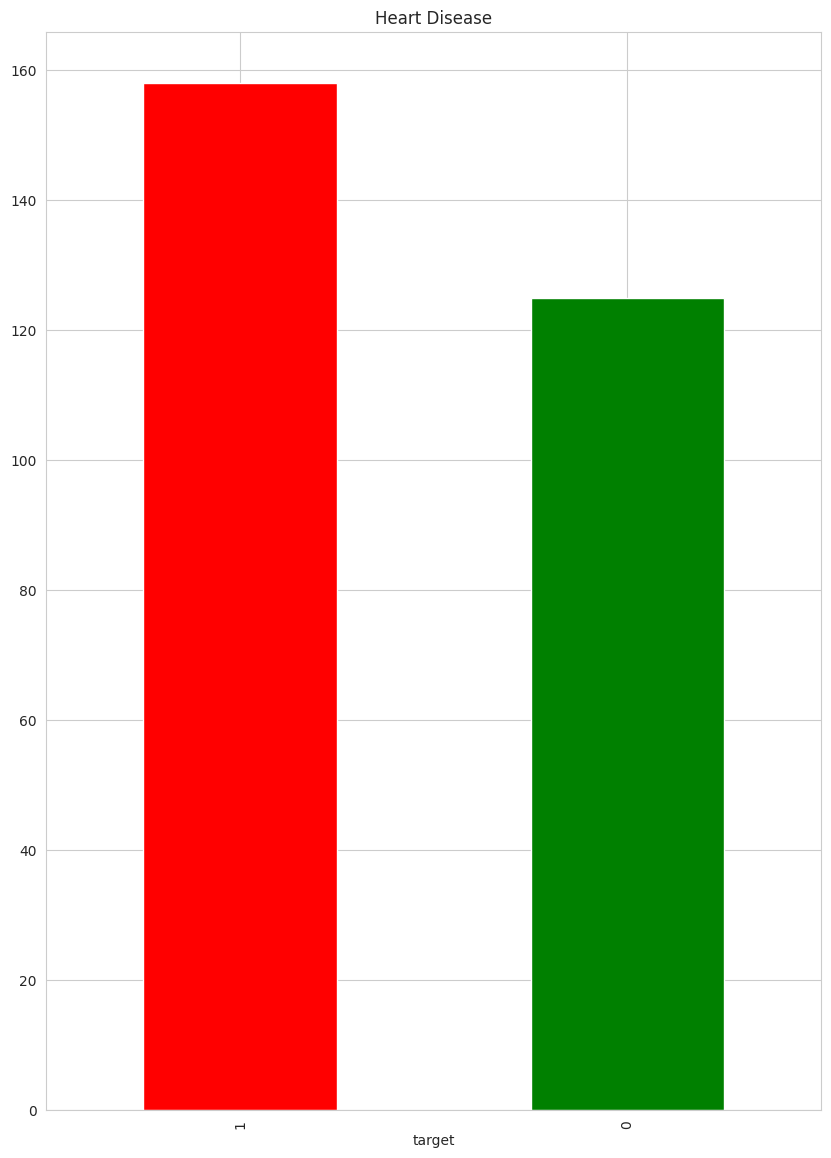

In [31]:
cont.plot(kind = 'bar', title = 'Heart Disease', color = ['r', 'g'])

Podemos ver que temos uma discrepância na quantidade de registros para valores target = 1 e = 0, o que pode causar um treinamento desproporcional. Mais pra frente trataremos isso.

### StandardScale()
A padronização dos dados para algoritmos de machine learning é algo essencial principalmente para modelos lineares e alguns outros. Os algoritmos ganham em performance e esperam receber os dados na mesma escala para facilitar o treinamento, e existem diversas técnicas para isso.
A discrepância entre escalas das features torna as coisas mais difíceis para o modelo, e colocar tudo na mesma escala (por exemplo, de 0 a 1) faz com que os modelos trabalhem com os dados de forma mais eficiente, melhorando os resultados.

Uma possibilidade é o StandardScale(), que será utilizado aqui.

Acompanhe o valor mínimo e máximo de colesterol antes e depois da padronização por exemplo

In [32]:
df4['chol'].min(), df4['chol'].max()

(126, 360)

### Dividindo a variável target do restante do conjunto, será chamada de variável y, enquanto o restante de X

In [33]:
X = df4.drop('target', axis = 1)
y = df4['target']

### Dividindo entre dados de treino e dados de teste
20% dos dados serão utilizados para teste

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
y_train.shape, y_test.shape

((226,), (57,))

In [36]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
217,57,150,276,112,0.6,True,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False
27,56,130,256,142,0.6,True,False,True,False,True,...,True,True,False,True,False,False,False,True,False,False
93,62,120,281,103,1.4,True,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True
153,69,160,234,131,0.1,True,False,False,True,True,...,False,True,False,True,False,False,False,False,True,False
194,57,132,207,168,0.0,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,61,150,243,137,1.0,True,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
78,68,144,193,141,3.4,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
115,63,124,197,136,0.0,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
289,61,138,166,125,3.6,True,False,False,False,False,...,True,True,False,True,False,False,False,False,True,False


### Elaboração do primeiro modelo - LogisticRegression

In [37]:
mod_logr = LogisticRegression(max_iter=10000)

#### Treinamento

In [38]:
mod_logr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [39]:
mod_logr.score(X_train, y_train)

0.8761061946902655

In [40]:
mod_logr.score(X_test, y_test)

0.8245614035087719

In [41]:
y_previsto = mod_logr.predict(X_test)
y_previsto

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

<Figure size 400x300 with 0 Axes>

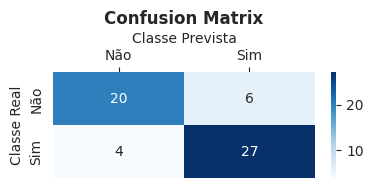

In [42]:
cm = confusion_matrix(y_test, y_previsto)
def plot_cm(cm):
    plt.figure(figsize=(4, 3))
    fig, ax = plt.subplots(figsize = (4,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Não', 'Sim'], yticklabels= ['Não', 'Sim'])
    plt.title('Confusion Matrix', fontweight = 'bold')
    ax.set_xlabel('Classe Prevista')
    ax.set_ylabel('Classe Real')
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.tick_params(axis = 'both', which = 'major', labelsize = 10, labelbottom = False, bottom = False, top = True, labeltop = True)
    plt.tight_layout()
    plt.show()
plot_cm(cm)

Se dividimos a diagonal mais escura (acertos do modelo) pelo total de dados de teste, chegamos no mesmo resultado de acurácia do modelo do que a função score.

##### Testando balanceameto para melhor performance
(evitar overfit de modelo aprender mais para valores target = 1)

<Axes: title={'center': 'Heart Disease'}, xlabel='target'>

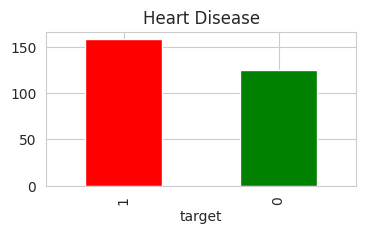

In [43]:
plt.figure(figsize = (4,2))
cont.plot(kind = 'bar', title = 'Heart Disease', color = ['r', 'g'])

#### Balanceando
Função cria registros para equiparar quantidade de registros para cada variável target. Faz isso avaliando o conjunto de dados e criando registros consistentes.

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
balanceador = SMOTE(random_state=100)

In [46]:
X_bal, y_bal = balanceador.fit_resample(X, y)

In [47]:
y_bal.value_counts()

target
0    158
1    158
Name: count, dtype: int64

Podemos ver que agora temos a mesma quantidade de registros

#### Testando nova performance

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.20, random_state=42)

In [49]:
mod_logr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [50]:
mod_logr.score(X_test, y_test)

0.78125

<Figure size 400x300 with 0 Axes>

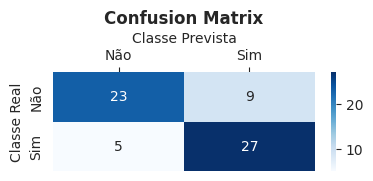

In [51]:
plot_cm(confusion_matrix(y_test, mod_logr.predict(X_test)))

Desempenho pior na previsão, portanto iremos continuar com os dados sem balanceamento

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
mod_logr.fit(X_train, y_train)
mod_logr.score(X_test, y_test)

0.8245614035087719

#### Criando função para testar os outros modelos

In [53]:
def modelo_ml(df, algoritmo, opt = 2):
    X = df.drop('target', axis = 1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Qual modelo
    if opt == 0: #serão os modelos que recebem esse parâmetro
        ml = algoritmo(max_iter = 10000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()
    
    
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    score_test = ml.score(X_test, y_test)
    print(f'Acurácia treino: {score_train*100:.2f}%')
    print(f'Acurácia teste: {score_test*100:.2f}%')
    
    y_previsto = ml.predict(X_test)
    print('--------Classification Report--------')
    print(classification_report(y_test, y_previsto))
    print('--------Confusion Matrix----------')
    cm = confusion_matrix(y_test, y_previsto)
    plot_cm(cm)
    
    return score_train, score_test

## Testando modelos

### LogisticRegression

Acurácia treino: 87.61%
Acurácia teste: 82.46%
--------Classification Report--------
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.82      0.87      0.84        31

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57

--------Confusion Matrix----------


<Figure size 400x300 with 0 Axes>

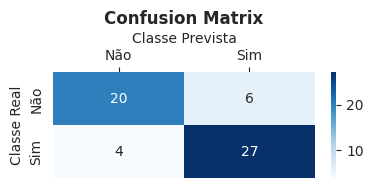

In [54]:
logreg_train, logreg_test = modelo_ml(df4, LogisticRegression, opt = 0)

### DecisionTreeClassifier

Acurácia treino: 100.00%
Acurácia teste: 77.19%
--------Classification Report--------
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.82      0.74      0.78        31

    accuracy                           0.77        57
   macro avg       0.77      0.77      0.77        57
weighted avg       0.78      0.77      0.77        57

--------Confusion Matrix----------


<Figure size 400x300 with 0 Axes>

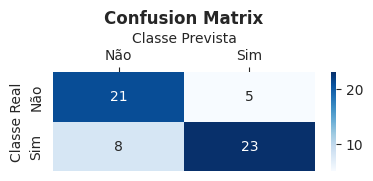

In [55]:
tree_train, tree_test = modelo_ml(df4, DecisionTreeClassifier)

### AdaBoostClassifier

Acurácia treino: 93.36%
Acurácia teste: 78.95%
--------Classification Report--------
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.79      0.84      0.81        31

    accuracy                           0.79        57
   macro avg       0.79      0.78      0.79        57
weighted avg       0.79      0.79      0.79        57

--------Confusion Matrix----------


<Figure size 400x300 with 0 Axes>

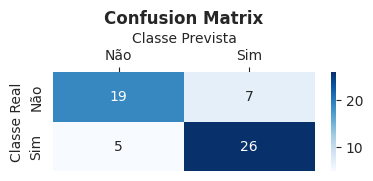

In [56]:
ada_train, ada_test = modelo_ml(df4, AdaBoostClassifier)

#### KNeighborsClassifier

Acurácia treino: 77.43%
Acurácia teste: 61.40%
--------Classification Report--------
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        26
           1       0.64      0.68      0.66        31

    accuracy                           0.61        57
   macro avg       0.61      0.61      0.61        57
weighted avg       0.61      0.61      0.61        57

--------Confusion Matrix----------


<Figure size 400x300 with 0 Axes>

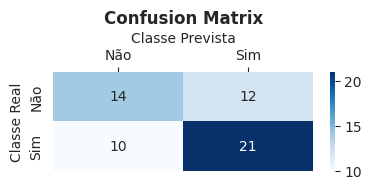

In [57]:
kn_train, kn_test = modelo_ml(df4, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia teste: 82.46%
--------Classification Report--------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.84      0.84      0.84        31

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57

--------Confusion Matrix----------


<Figure size 400x300 with 0 Axes>

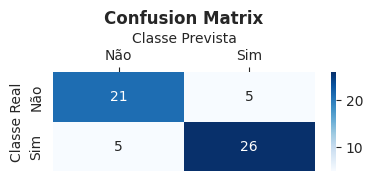

In [58]:
rand_train, rand_test = modelo_ml(df4, RandomForestClassifier)

### Organizando os resultados obtidos

In [59]:
result = {'Modelo': ['LogisticRegression', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'KNeighborsClassifier', 'RandomForestClassifier'],
         'Acurácia Treino': [round(logreg_train * 100, 2), round(tree_train * 100, 2), round(ada_train * 100, 2), round(kn_train * 100, 2), round(rand_train * 100, 2)],
         'Acurácia Teste': [round(logreg_test * 100, 2), round(tree_test * 100, 2), round(ada_test * 100, 2), round(kn_test * 100, 2), round(rand_test * 100, 2)]}

df_result = pd.DataFrame(result)
df_result.sort_values(by = 'Acurácia Teste', ascending = False, inplace = True)
print(df_result)

                   Modelo  Acurácia Treino  Acurácia Teste
0      LogisticRegression            87.61           82.46
4  RandomForestClassifier           100.00           82.46
2      AdaBoostClassifier            93.36           78.95
1  DecisionTreeClassifier           100.00           77.19
3    KNeighborsClassifier            77.43           61.40


#### Os modelos que tiveram melhor performance nos dados de teste foram LogisticRegression e RandomForestClassifier

### Testando padronização dos dados com StandarScaler

In [60]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
217,57,150,276,112,0.6,True,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False
27,56,130,256,142,0.6,True,False,True,False,True,...,True,True,False,True,False,False,False,True,False,False
93,62,120,281,103,1.4,True,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True
153,69,160,234,131,0.1,True,False,False,True,True,...,False,True,False,True,False,False,False,False,True,False
194,57,132,207,168,0.0,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [61]:
scaler = StandardScaler()
df4[c_num] = scaler.fit_transform(df4[c_num])
df4[c_num] = scaler.fit_transform(df4[c_num])

In [62]:
df4.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.224919,-0.317917,-0.680075,0.796365,0.046903,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.115174,0.658608,-0.881981,0.222452,2.096513,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.750489,0.984117,-1.532566,-1.101964,1.608511,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.762785,1.179422,-0.881981,0.487335,-0.929101,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.872530,0.528405,1.159512,-1.940760,0.925307,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


Observe que agora as colunas de valores numéricos estão padronizadas

### Testando modelo com colunas padronizadas

Acurácia treino: 87.61%
Acurácia teste: 82.46%
--------Classification Report--------
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.82      0.87      0.84        31

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57

--------Confusion Matrix----------


<Figure size 400x300 with 0 Axes>

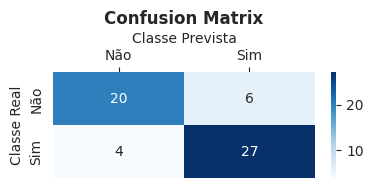

In [63]:
logreg_train, logreg_test = modelo_ml(df4, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia teste: 80.70%
--------Classification Report--------
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.83      0.81      0.82        31

    accuracy                           0.81        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.81      0.81      0.81        57

--------Confusion Matrix----------


<Figure size 400x300 with 0 Axes>

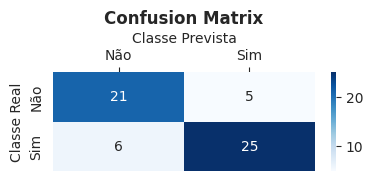

In [64]:
tree_train, tree_test = modelo_ml(df4, DecisionTreeClassifier)

Acurácia treino: 93.36%
Acurácia teste: 78.95%
--------Classification Report--------
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.79      0.84      0.81        31

    accuracy                           0.79        57
   macro avg       0.79      0.78      0.79        57
weighted avg       0.79      0.79      0.79        57

--------Confusion Matrix----------


<Figure size 400x300 with 0 Axes>

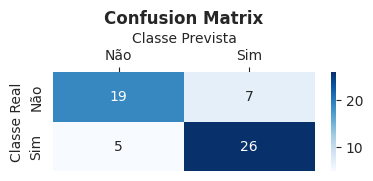

In [65]:
ada_train, ada_test = modelo_ml(df4, AdaBoostClassifier)

Acurácia treino: 86.28%
Acurácia teste: 78.95%
--------Classification Report--------
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.83      0.77      0.80        31

    accuracy                           0.79        57
   macro avg       0.79      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57

--------Confusion Matrix----------


<Figure size 400x300 with 0 Axes>

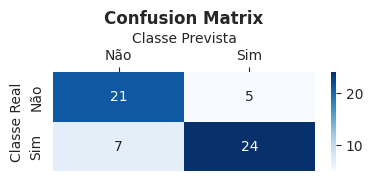

In [66]:
kn_train, kn_test = modelo_ml(df4, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia teste: 80.70%
--------Classification Report--------
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.83      0.81      0.82        31

    accuracy                           0.81        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.81      0.81      0.81        57

--------Confusion Matrix----------


<Figure size 400x300 with 0 Axes>

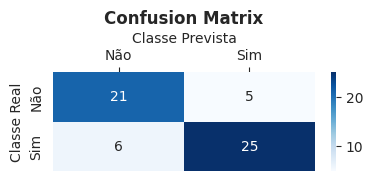

In [67]:
rand_train, rand_test = modelo_ml(df4, RandomForestClassifier)

In [68]:
result2 = {'Modelo': ['LogisticRegression', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'KNeighborsClassifier', 'RandomForestClassifier'],
         'Acurácia Treino': [round(logreg_train * 100, 2), round(tree_train * 100, 2), round(ada_train * 100, 2), round(kn_train * 100, 2), round(rand_train * 100, 2)],
         'Acurácia Teste': [round(logreg_test * 100, 2), round(tree_test * 100, 2), round(ada_test * 100, 2), round(kn_test * 100, 2), round(rand_test * 100, 2)]}

df_result2 = pd.DataFrame(result2)
df_result2.sort_values(by = 'Acurácia Teste', ascending = False, inplace = True)
print(df_result2)

                   Modelo  Acurácia Treino  Acurácia Teste
0      LogisticRegression            87.61           82.46
1  DecisionTreeClassifier           100.00           80.70
4  RandomForestClassifier           100.00           80.70
2      AdaBoostClassifier            93.36           78.95
3    KNeighborsClassifier            86.28           78.95


In [69]:
comparacao = pd.DataFrame()
comparacao['Modelo'] = result['Modelo']
comparacao['Antes'] = result['Acurácia Teste']
comparacao['Depois'] = result2['Acurácia Teste']
comparacao

,Modelo,Antes,Depois
0,LogisticRegression,82.46,82.46
1,DecisionTreeClassifier,77.19,80.70
2,AdaBoostClassifier,78.95,78.95
3,KNeighborsClassifier,61.40,78.95
4,RandomForestClassifier,82.46,80.70


Neste caso, a padronização não surgiu tanto efeito quanto esperado, podemos escolher o modelo de LogisticRegression como ideal dentre os testados. Entretanto, os modelos podem ser aperfeiçoados, principalmente os de árvores de decisão.

## Investigando a tomada de decisão do modelo

In [101]:
mod_logr = LogisticRegression(max_iter=10000)
mod_logr.fit(X_train, y_train)
mod_logr.score(X_test, y_test)
plt.figure(figsize = (10, 16))
importances = mod_logr.coef_
importances

df_coeficientes = pd.DataFrame(columns = ['Feature', 'Coeficiente'])
feature = []
coeficientes = []
for i, coef in enumerate(importances[0]):
    feature.append(X_train.columns[i])
    coeficientes.append(coef)
df_coeficientes['Feature'] = feature
df_coeficientes['Coeficiente'] = coeficientes
df_coeficientes

,Feature,Coeficiente
0,age,0.002976
1,trestbps,-0.013556
2,chol,-0.007076
3,thalach,0.024201
4,oldpeak,-0.360576
5,sex_1,-1.125139
6,cp_1,0.722727
7,cp_2,1.523063
8,cp_3,1.414673
9,fbs_1,0.586091


<Figure size 1000x1600 with 0 Axes>

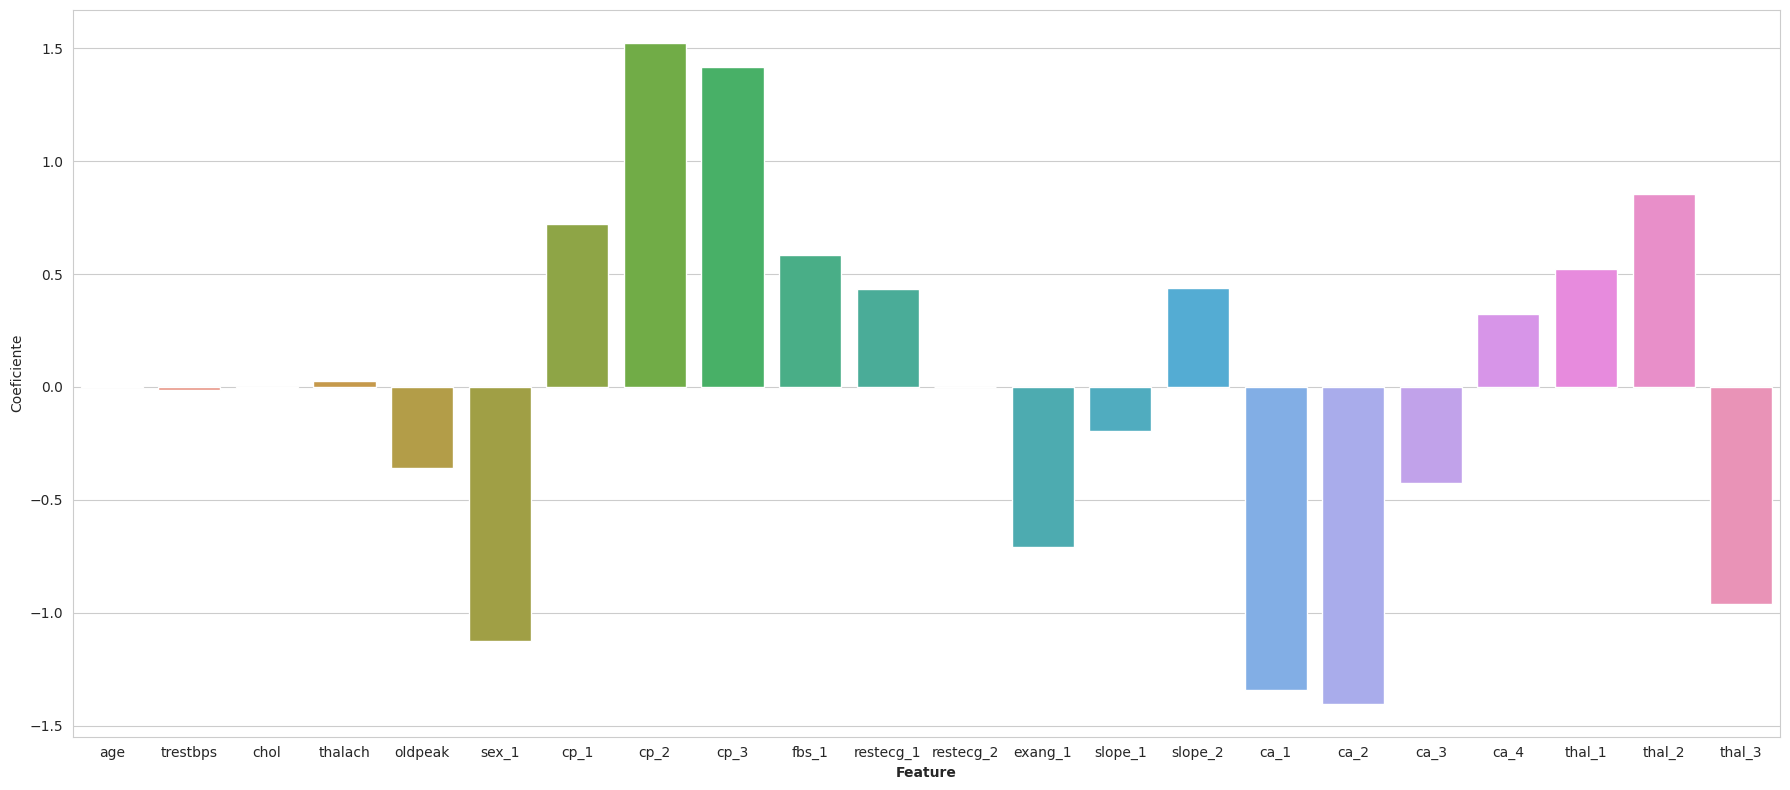

In [108]:
plt.figure(figsize = (18,8))
sns.barplot(data = df_coeficientes, x = 'Feature', y = 'Coeficiente')
plt.xlabel('Feature', fontweight = 'bold')
plt.tight_layout()

A magnitude das variáveis (maior valor absoluto), indicam o grau de importância para tomada de decisão do modelo

## Tentando melhorar o modelo de RandomForest

In [109]:
from sklearn.model_selection import GridSearchCV

In [114]:
def find_best_params_rf(X_train, y_train):
    # Definir os parâmetros que você deseja otimizar
    param_grid = {
        'n_estimators': [100, 200, 300],  # Número de árvores na floresta
        'max_depth': [None, 5, 10, 20],    # Profundidade máxima das árvores
        'min_samples_split': [2, 5, 10],   # Número mínimo de amostras necessárias para dividir um nó
        'min_samples_leaf': [1, 2, 4]      # Número mínimo de amostras necessárias em uma folha
    }
    
    # Criar o modelo RandomForest
    rf = RandomForestClassifier(random_state=42)

    # Inicializar a busca em grade com validação cruzada
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

    # Executar a busca em grade para encontrar os melhores parâmetros
    grid_search.fit(X_train, y_train)

    # Retornar os melhores parâmetros encontrados
    return grid_search.best_params_

In [115]:
melhores_parametros = find_best_params_rf(X_train, y_train)
melhores_parametros

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END m

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [131]:
rf_melhorado = RandomForestClassifier(max_depth= 5, min_samples_leaf = 4, min_samples_split = 10,n_estimators = 100)

In [136]:
rf_melhorado.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10)

In [138]:
rf_melhorado.score(X_train, y_train)

0.8805309734513275

In [137]:
rf_melhorado.score(X_test, y_test)

0.8070175438596491

## Entendo a importância dada pelo modelo RandomForest para cada variável

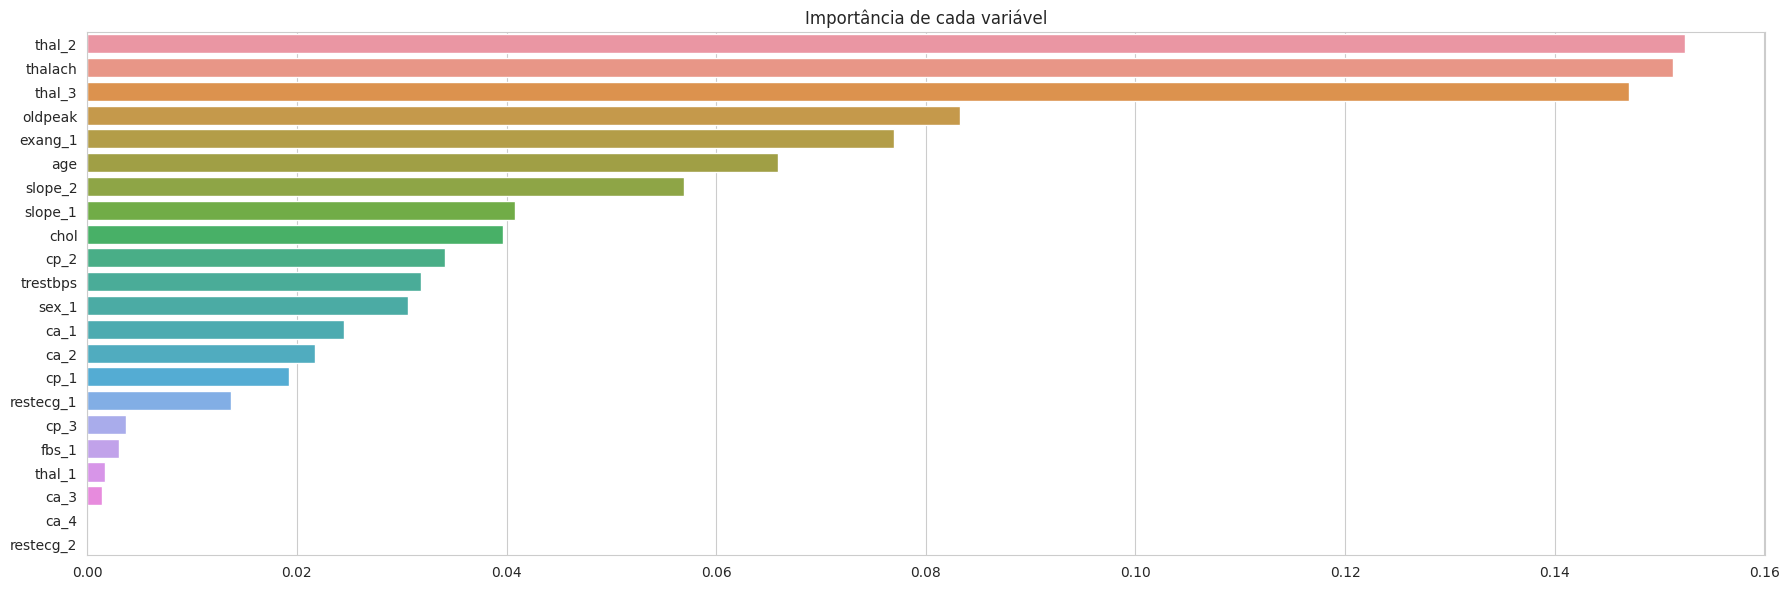

In [139]:
plt.figure(figsize = (18,6))
importances = pd.Series(data = rf_melhorado.feature_importances_, index = X_train.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x = importances, y = importances.index, orient = 'h')
plt.title('Importância de cada variável')
plt.tight_layout()

Fato curioso é que por exemplo a variável idade foi uma das mais importantes para a decisão do modelo, enquanto no modelo de LogisticRegression seu coeficiente teve pouca representatividade. Interessante, portanto, testar a junção de escolhas do modelo. Juntaremos um modelo linear com um não linear.

## Criando Ensemble model (LR and RFC)

In [140]:
lr = LogisticRegression(max_iter= 10000)

In [144]:
from sklearn.ensemble import VotingClassifier

In [153]:
ensemble_model = VotingClassifier(estimators=[('lr', lr), ('rf', rf_melhorado)], voting='soft')

In [154]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10))],
                 voting='soft')

In [155]:
ensemble_model.score(X_train, y_train)

0.8761061946902655

In [156]:
ensemble_model.score(X_test, y_test)

0.8421052631578947

### Conclusão: Modelo com junção de RandomForestClassifier e LogisticRegression (e escolha 'soft') foi o melhor até aqui